In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [3]:
df = pd.read_csv('./Data/investment_trends.csv', index_col=0)
df = df[df.index <= 2016]

In [4]:
df.columns

Index(['Government R&D', 'Corporate R&D', 'Venture capital',
       'Private equity expansion capital', 'Public markets', 'Asset finance',
       'Asset Finance minus Re-invested equity', 'Small distributed capacity',
       'Private equity buy-outs', 'Public markets investor exits',
       'Corporate M&A', 'Project acquisition & refinancing',
       'Total: M&A/ buy-outs etc.'],
      dtype='object')

In [5]:
# IDEA: Plot both cumulative investments and investments year by year

In [6]:
def plot_indicators(indicators, indicator, is_cumulative=False):
    if is_cumulative:
        h = df[indicators].cumsum().plot()
        title = f'Cumulative investments in {indicator} World \n (2004-2019)'
    else:
        h = df[indicators].plot()
        title = f'Investments in {indicator} World \n (2004-2019)'
#     h.set_title(title)
    h.set_ylabel('USD Billions')
    h.get_figure().savefig(f'./Plots/{title}')

## R&D

<Figure size 1152x576 with 0 Axes>

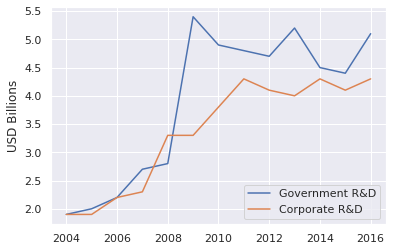

In [7]:
plt.figure(figsize=(16, 8))
plot_indicators(['Government R&D', 'Corporate R&D'], 'Technology research')

## Venture capital

All money invested by venture capital in the equity of specialist companies developing renewable energy technology. Similar investment in companies setting up generating capacity through special purpose vehicles is counted in the asset financing figure.

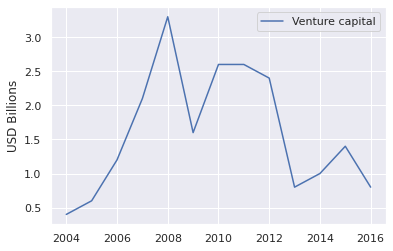

In [9]:
plot_indicators(['Venture capital'], 'Technology development')

## Private equity expansion capital

All money invested by private equity funds in the equity of specialist companies developing renewable energy technology. Similar investment in companies setting up generating capacity through special purpose vehicles is counted in the asset financing figure.

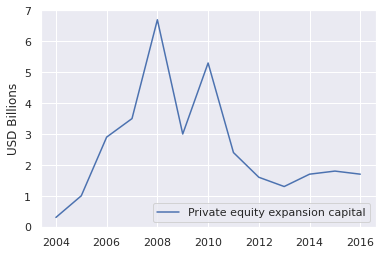

In [10]:
plot_indicators(['Private equity expansion capital'], 'Private equity')

## Public markets

All money invested in the equity of specialist publicly quoted companies developing renewable energy technology and clean power generation.

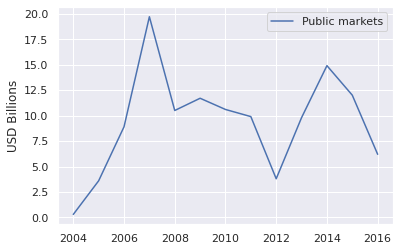

In [11]:
plot_indicators(['Public markets'], 'Public markets')

## Asset finance & Small distributed capacity

Asset finance: All money invested in renewable energy generation projects, whether from internal company balance sheets, from debt finance, or from equity finance. It excludes refinancings. The project may or may not be commissioned in the same year.

Small distributed capacity: Annual investment in small-scale and residential projects such as rooftop solar is estimated. These figures are based on annual installation data, provided by industry associations and REN21.

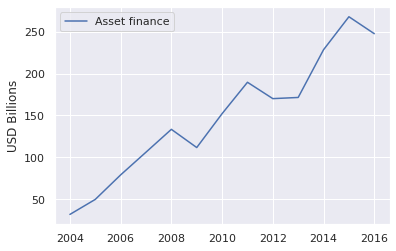

In [12]:
plot_indicators(['Asset finance'], '')

## M&A (Mergers and acquisitions)

The value of existing equity and debt purchased by new corporate buyers in companies developing renewable technology or operating renewable energy projects.

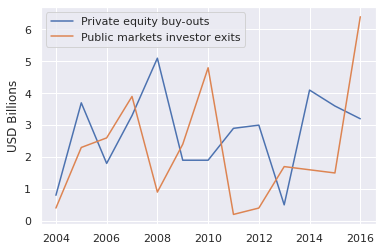

In [13]:
plot_indicators(['Private equity buy-outs', 'Public markets investor exits'], '')

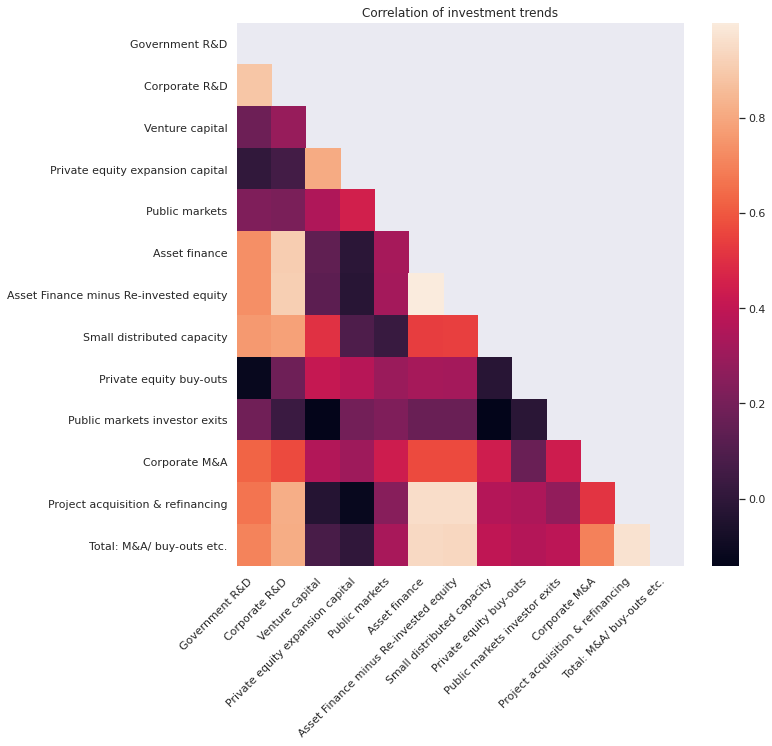

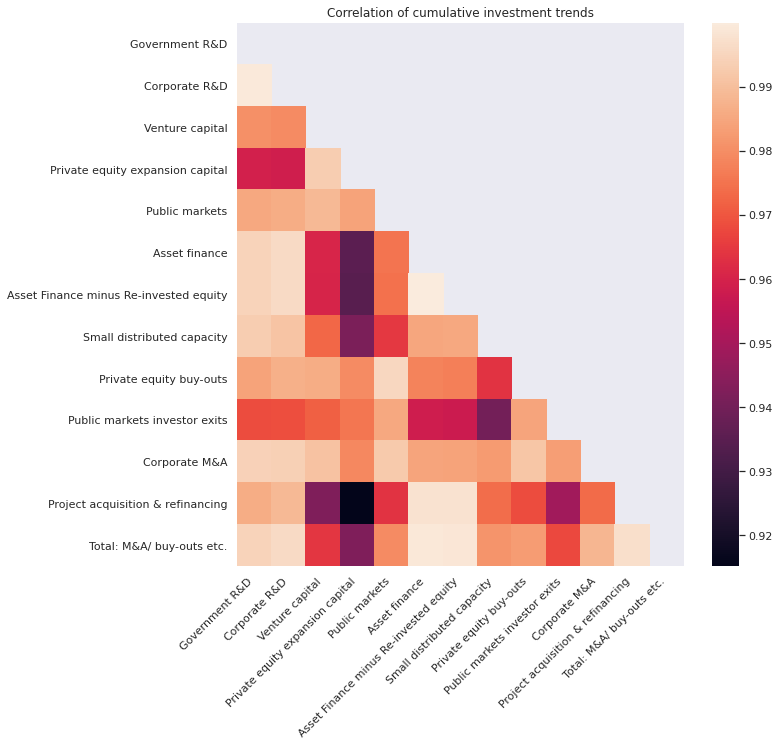

In [14]:
def plot_corr(is_cumulative):
    plt.figure(figsize=(10, 10))
    if is_cumulative:
        corr = df.cumsum().corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))
        h = sns.heatmap(corr, mask=mask)
        title = 'Correlation of cumulative investment trends'
    else:
        corr = df.corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))
        h = sns.heatmap(corr, mask=mask)
        title = 'Correlation of investment trends'
    h.set_title(title)
    h.set_xticklabels(h.get_xticklabels(), rotation=45, ha='right')
    h.get_figure().savefig(f'./Plots/{title}', bbox_inches="tight")
    
plot_corr(False)
plot_corr(True)